In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import scipy
from zipfile36 import ZipFile
from io import BytesIO
from sklearn.linear_model import LinearRegression

Request henter .zip filen fra Oxford Man

In [2]:
url = 'https://realized.oxford-man.ox.ac.uk/images/oxfordmanrealizedvolatilityindices.zip'
data = requests.get(url, stream=True).content

Zipfile udpakker filen, herefter gemmes den i en DataFrame

In [3]:
z = ZipFile(BytesIO(data))
z.extractall()
df = pd.read_csv('OxfordManRealizedVolatilityIndices.csv', index_col=0, header=0 )
print(df.columns)

Index(['Symbol', 'close_price', 'rv5_ss', 'rk_parzen', 'rv10_ss',
       'rk_twoscale', 'rsv_ss', 'rv5', 'rk_th2', 'close_time', 'open_time',
       'rsv', 'bv_ss', 'medrv', 'open_to_close', 'bv', 'open_price', 'rv10',
       'nobs'],
      dtype='object')


In [4]:
df['Symbol'].unique()

array(['.AEX', '.AORD', '.BFX', '.BSESN', '.BVLG', '.BVSP', '.DJI',
       '.FCHI', '.FTMIB', '.FTSE', '.GDAXI', '.GSPTSE', '.HSI', '.IBEX',
       '.IXIC', '.KS11', '.KSE', '.MXX', '.N225', '.NSEI', '.OMXC20',
       '.OMXHPI', '.OMXSPI', '.OSEAX', '.RUT', '.SMSI', '.SPX', '.SSEC',
       '.SSMI', '.STI', '.STOXX50E'], dtype=object)

In [5]:
df = df.reset_index()
df = df.rename(columns={'index':'Date'})
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.date

In [6]:
df

,Date,Symbol,close_price,rv5_ss,rk_parzen,rv10_ss,rk_twoscale,rsv_ss,rv5,rk_th2,close_time,open_time,rsv,bv_ss,medrv,open_to_close,bv,open_price,rv10,nobs
0,2000-01-03,.AEX,675.44,0.000130,0.000179,0.000178,0.000103,0.000046,0.000130,0.000102,163015.0,90101.0,0.000046,0.000100,0.000050,-0.000340,0.000100,675.67,0.000178,1795.0
1,2000-01-04,.AEX,642.25,0.000201,0.000423,0.000261,0.000199,0.000147,0.000201,0.000201,163016.0,90416.0,0.000147,0.000207,0.000075,-0.033606,0.000207,664.20,0.000261,1785.0
2,2000-01-05,.AEX,632.31,0.000491,0.000324,0.000714,0.000325,0.000328,0.000491,0.000345,163016.0,90016.0,0.000328,0.000361,0.000166,-0.001675,0.000361,633.37,0.000714,1801.0
3,2000-01-06,.AEX,624.21,0.000225,0.000219,0.000182,0.000218,0.000116,0.000225,0.000221,163002.0,90016.0,0.000116,0.000258,0.000152,-0.013130,0.000258,632.46,0.000182,1799.0
4,2000-01-07,.AEX,644.86,0.000138,0.000155,0.000157,0.000126,0.000048,0.000138,0.000123,163016.0,90046.0,0.000048,0.000130,0.000039,0.025013,0.000130,628.93,0.000157,1798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157037,2022-01-26,.STOXX50E,4162.50,0.000140,0.000231,0.000161,0.000125,0.000033,0.000140,0.000126,173004.0,90015.0,0.000033,0.000076,0.000041,0.015980,0.000076,4096.51,0.000161,4211.0
157038,2022-01-27,.STOXX50E,4174.08,0.000251,0.000220,0.000285,0.000206,0.000163,0.000251,0.000211,173005.0,90015.0,0.000163,0.000154,0.000109,0.007044,0.000154,4144.78,0.000285,4216.0
157039,2022-01-28,.STOXX50E,4137.74,0.000213,0.000217,0.000191,0.000203,0.000113,0.000213,0.000201,173015.0,90015.0,0.000113,0.000238,0.000162,-0.008862,0.000238,4174.57,0.000191,4213.0
157040,2022-01-31,.STOXX50E,4154.25,0.000117,0.000162,0.000121,0.000149,0.000050,0.000117,0.000152,173002.0,90015.0,0.000050,0.000109,0.000057,-0.001809,0.000109,4161.77,0.000121,4158.0


In [7]:
plt.style.use('ggplot')

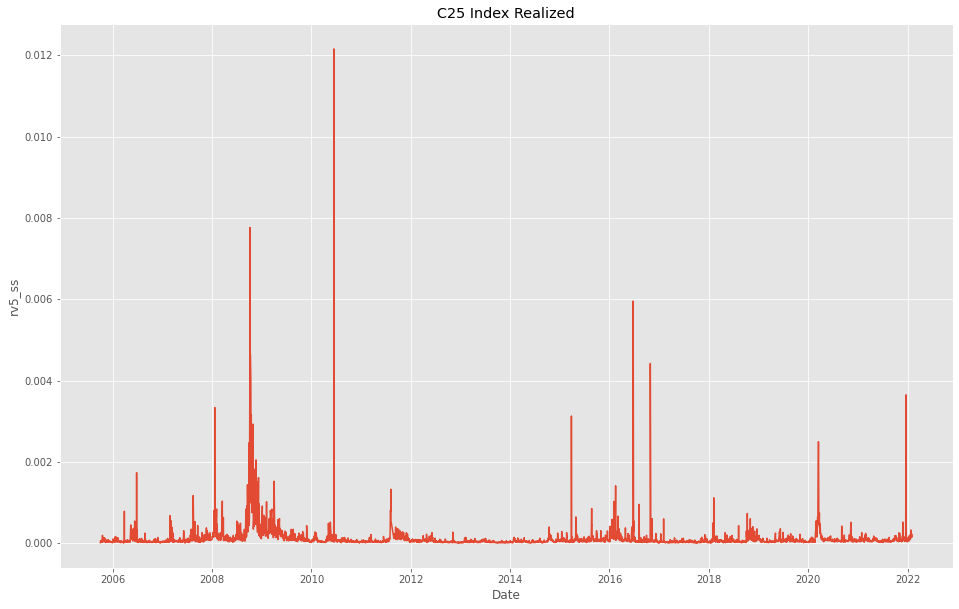

In [8]:
plt.rcParams['figure.figsize']=(16,10)

sns.lineplot(data=df[df['Symbol']== '.OMXC20'], x="Date", y="rv5_ss")

plt.title('C25 Index Realized')

plt.show()

In [9]:
df['rv5_diff'] = df['rv5'].diff()

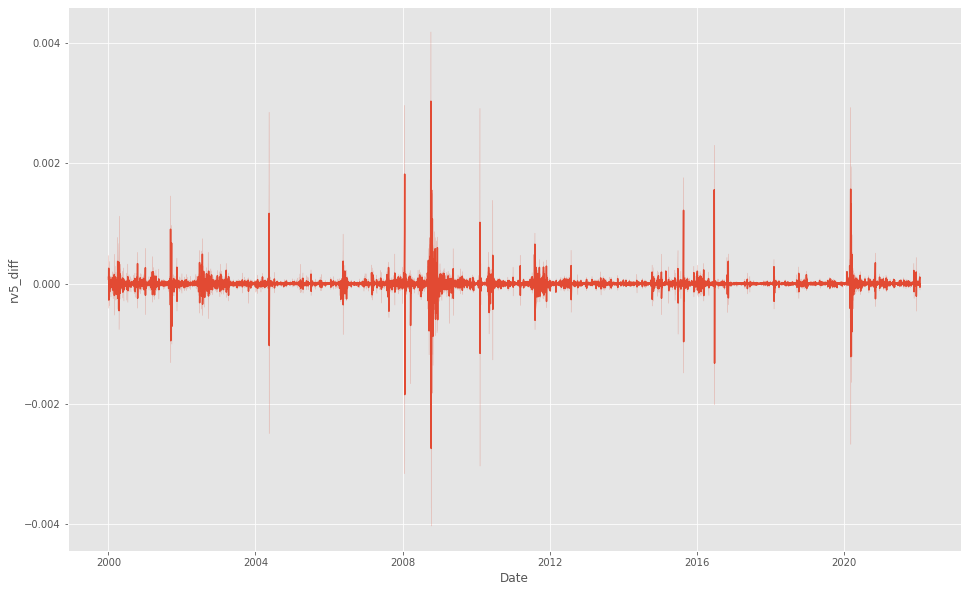

In [10]:
sns.lineplot(data=df, x="Date", y="rv5_diff")

plt.show()

## Hurst parameter

In [47]:
df2 = df[df['Symbol'] == '.SPX'][['Date', 'rv5']]

In [48]:
df2['rv5_log_vol'] = np.log(np.sqrt(df2['rv5']))

In [49]:
df2

,Date,rv5,rv5_log_vol
131430,2000-01-03,0.000141,-4.434032
131431,2000-01-04,0.000224,-4.201640
131432,2000-01-05,0.000314,-4.032610
131433,2000-01-06,0.000131,-4.470883
131434,2000-01-07,0.000094,-4.638124
...,...,...,...
136960,2022-01-25,0.000401,-3.910185
136961,2022-01-26,0.000506,-3.794058
136962,2022-01-27,0.000299,-4.057225
136963,2022-01-28,0.000263,-4.122441


In [40]:
#Fra grafer i paper benytter de cirka dette endepunkt
np.exp(4)

54.598150033144236

In [41]:
x = np.arange(1, 55)

In [ ]:
fnc = lambda x, q: [np.mean(np.abs(df2['rv5_log_vol'] - df2['rv5_log_vol'].shift(delta)) ** q) for delta in x]

q = [0.5, 1, 1.5, 2, 3]

In [101]:
plot_df = []

plot_df.append(np.log(x))

for i in q:
    plot_df.append(np.log(fnc(x, i)))

plot_df = pd.DataFrame(np.transpose(plot_df))

In [102]:
plot_df = plot_df.rename(columns={0: 'x', 1: 'q = 0.5', 2:'q = 1', 3:'q = 1.5', 4:'q = 2', 5:'q = 3'})

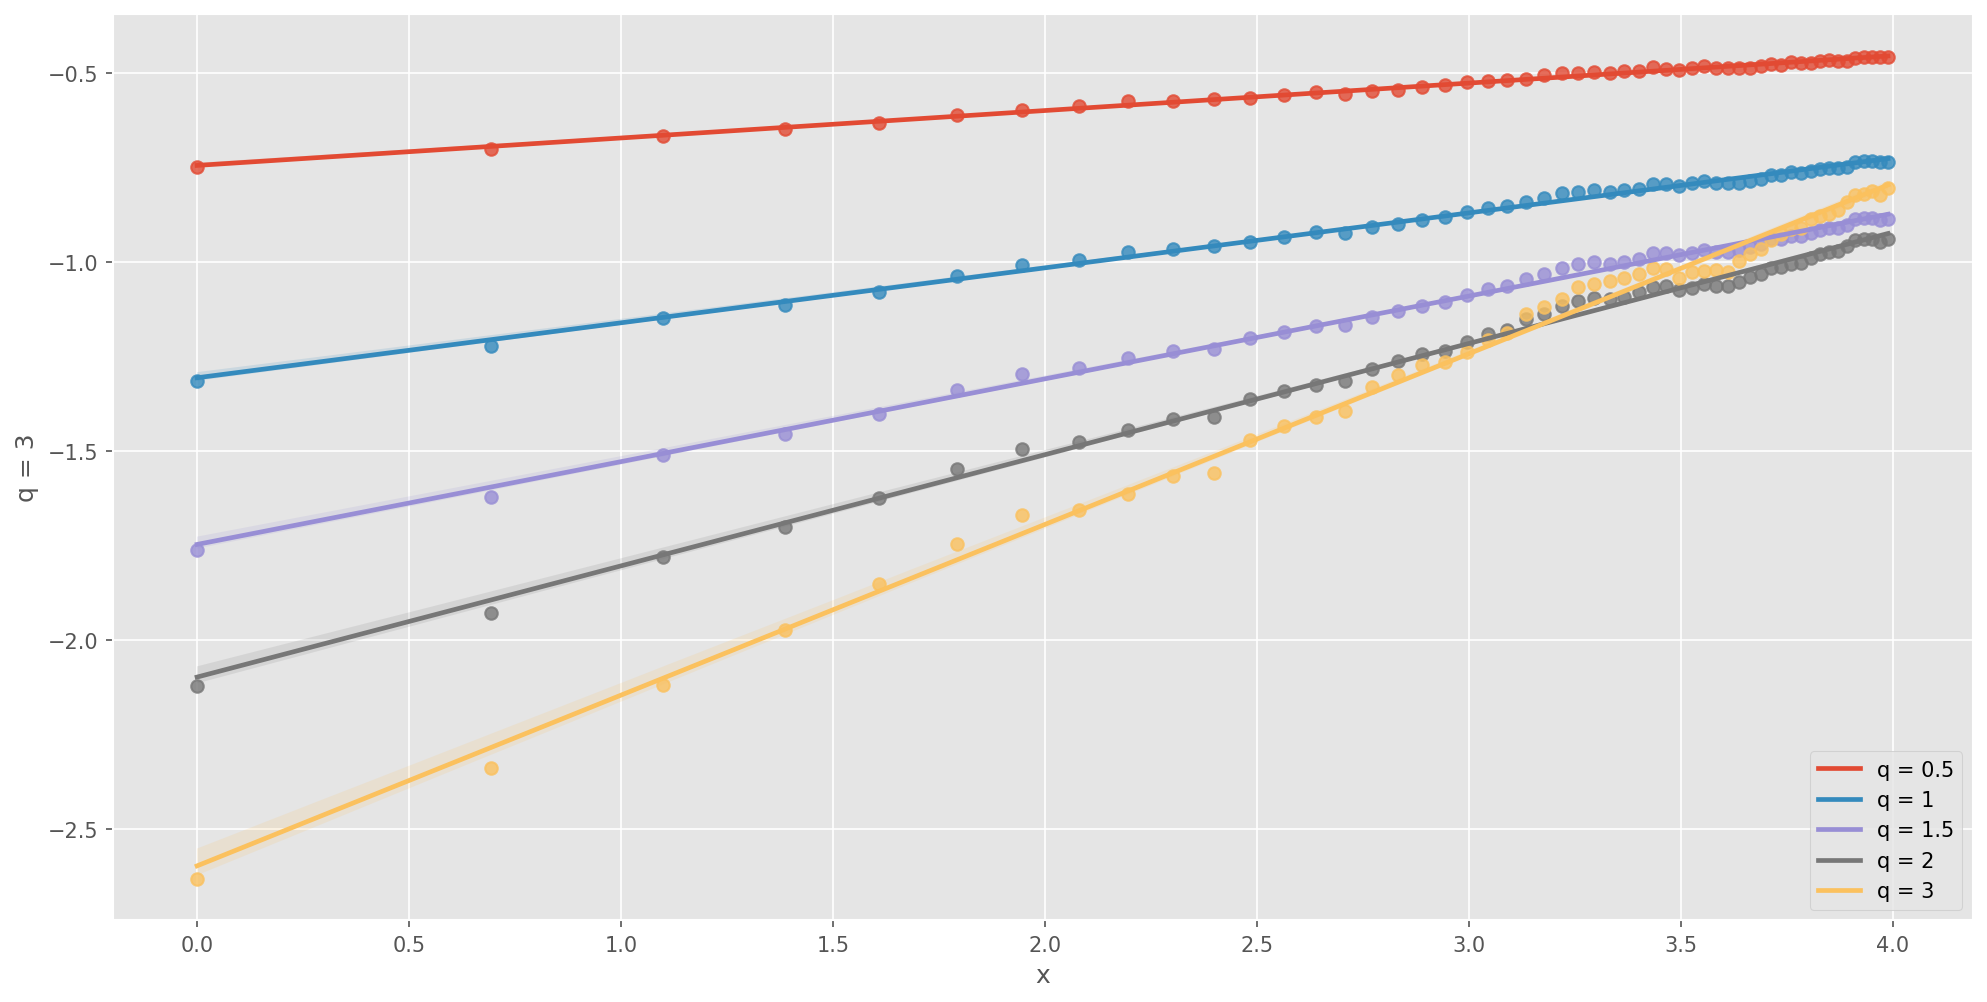

In [111]:
fig, ax = plt.subplots(1, 1, figsize = (16,8), dpi = 150)

for i in q:
    ax = sns.regplot(x='x', y='q = {}'.format(i), data=plot_df)

plt.legend(labels=['q = 0.5','q = 1','q = 1.5','q = 2','q = 3'])
plt.xlabel('$\log (\Delta)$')
plt.ylabel('$\log (m(q,\Delta))$')
plt.show()

In [150]:
model = []

for i in q:
    z = LinearRegression().fit(np.log(x).reshape(-1,1), np.log(fnc(x, i)))
    model.append(z.coef_)

model = pd.DataFrame(np.transpose(model))

In [152]:
model

,0,1,2,3,4
0,0.072622,0.145414,0.219052,0.294235,0.4517


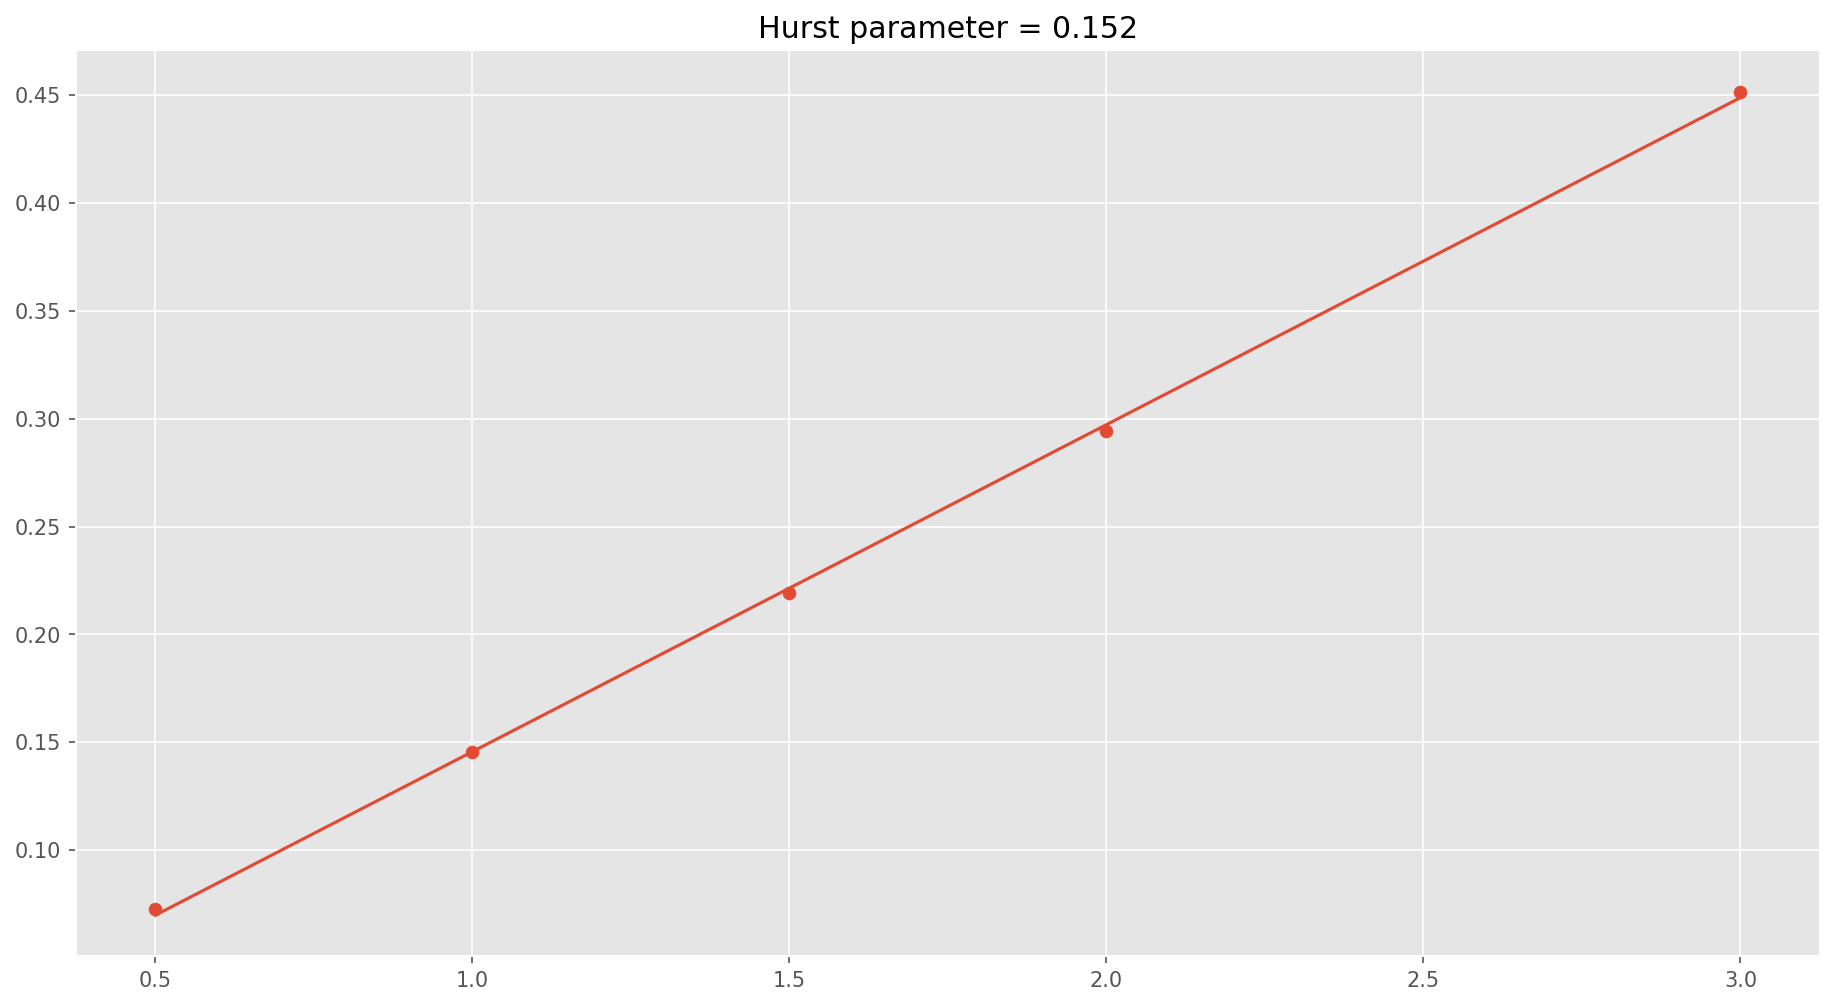

In [184]:
fig, ax = plt.subplots(1, 1, figsize = (15,8), dpi = 150)

b, a = np.polyfit(q, model.loc[0,:], 1)

plt.scatter(q, model)
plt.plot(q, b*np.array(q)+a)

plt.title('.SPX Hurst parameter = {:.3f}'.format(b))

plt.show()

In [194]:
df2 = df[df['Symbol'] == '.OMXC20'][['Date', 'rv5']]

In [195]:
df2['rv5_log_vol'] = np.log(np.sqrt(df2['rv5']))

In [196]:
df2

,Date,rv5,rv5_log_vol
104331,2005-10-02,0.000019,-5.441547
104332,2005-10-03,0.000036,-5.120729
104333,2005-10-04,0.000048,-4.969581
104334,2005-10-05,0.000069,-4.787467
104335,2005-10-06,0.000050,-4.951339
...,...,...,...
108385,2022-01-26,0.000200,-4.259241
108386,2022-01-27,0.000209,-4.236609
108387,2022-01-28,0.000225,-4.199709
108388,2022-01-31,0.000151,-4.400488


In [197]:
#Fra grafer i paper benytter de cirka dette endepunkt
np.exp(4)

54.598150033144236

In [198]:
x = np.arange(1, 55)

In [199]:
fnc = lambda x, q: [np.mean(np.abs(df2['rv5_log_vol'] - df2['rv5_log_vol'].shift(delta)) ** q) for delta in x]

q = [0.5, 1, 1.5, 2, 3]

In [200]:
plot_df = []

plot_df.append(np.log(x))

for i in q:
    plot_df.append(np.log(fnc(x, i)))

plot_df = pd.DataFrame(np.transpose(plot_df))

In [201]:
plot_df = plot_df.rename(columns={0: 'x', 1: 'q = 0.5', 2:'q = 1', 3:'q = 1.5', 4:'q = 2', 5:'q = 3'})

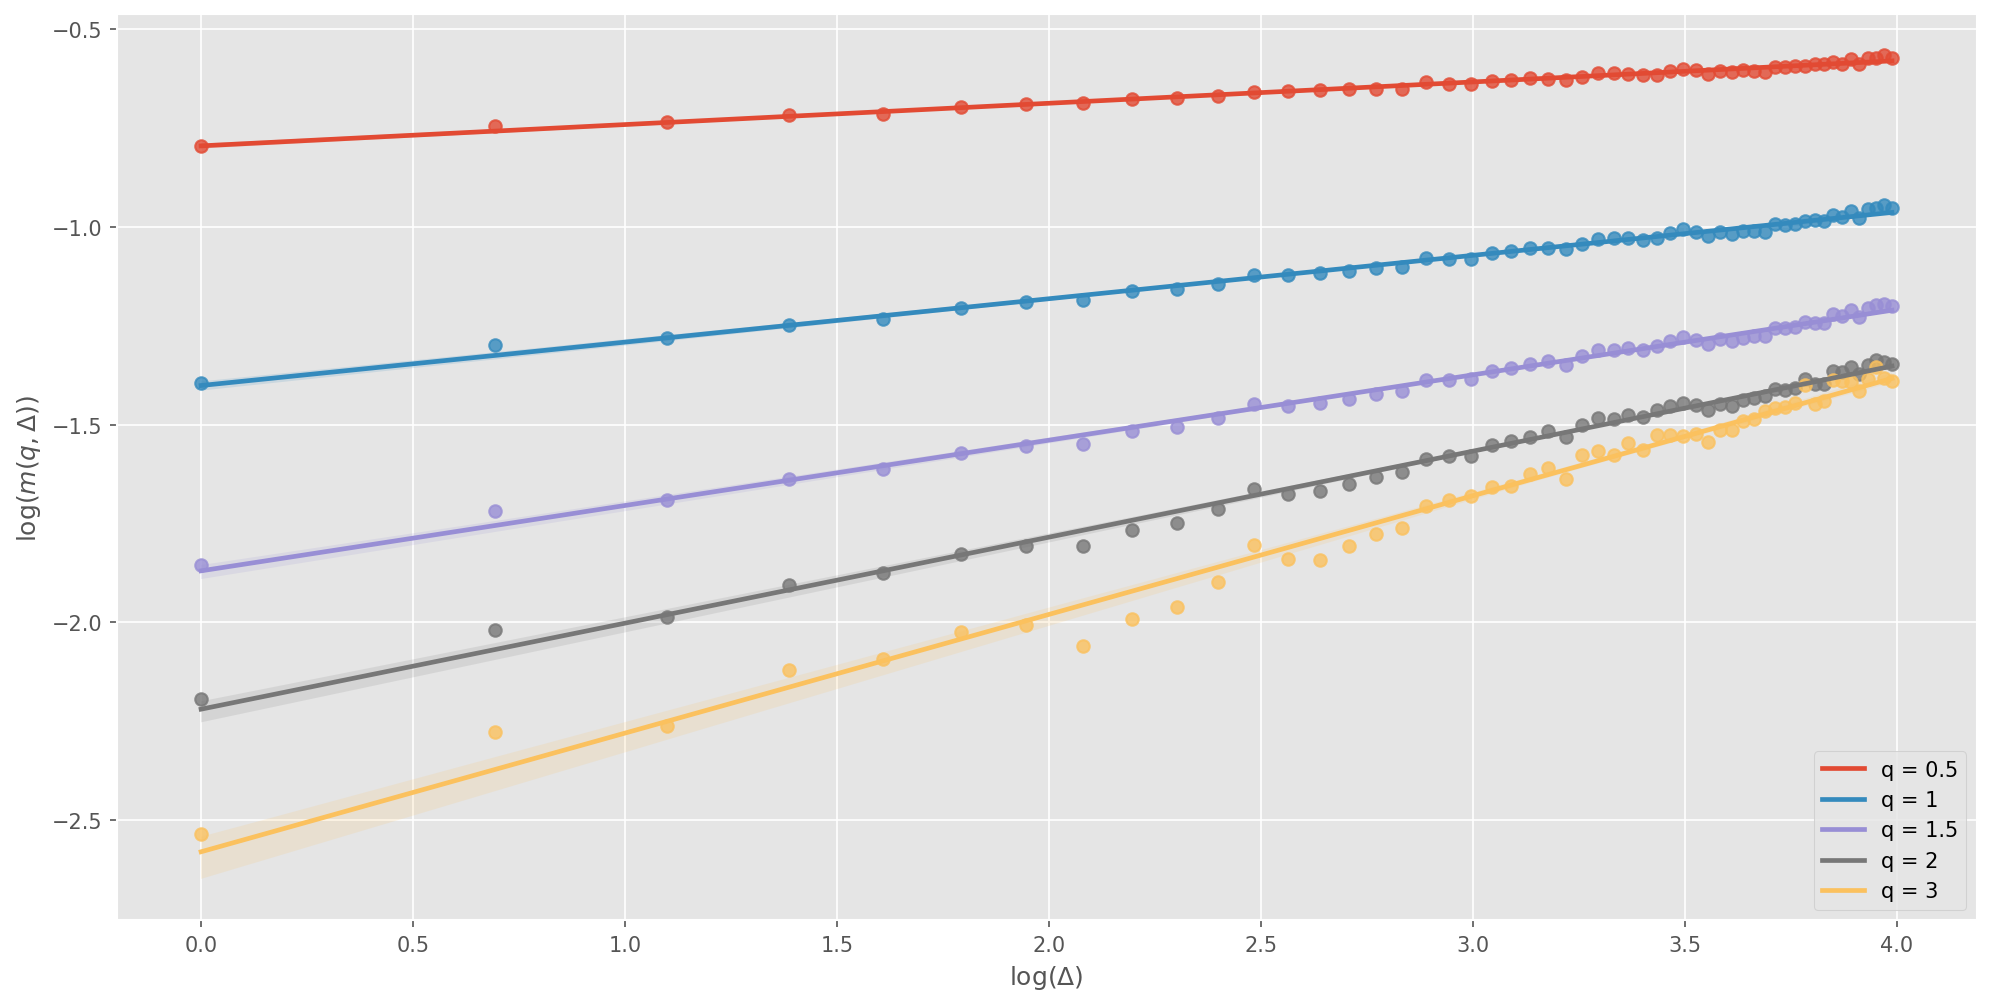

In [207]:
fig, ax = plt.subplots(1, 1, figsize = (16,8), dpi = 150)

for i in q:
    ax = sns.regplot(x='x', y='q = {}'.format(i), data=plot_df)

plt.legend(labels=['q = 0.5','q = 1','q = 1.5','q = 2','q = 3'])
plt.xlabel('$\log (\Delta)$')
plt.ylabel('$\log (m(q,\Delta))$')
plt.show()

In [203]:
model = []

for i in q:
    z = LinearRegression().fit(np.log(x).reshape(-1,1), np.log(fnc(x, i)))
    model.append(z.coef_)

model = pd.DataFrame(np.transpose(model))

In [204]:
model

,0,1,2,3,4
0,0.053864,0.109699,0.165157,0.217441,0.300014


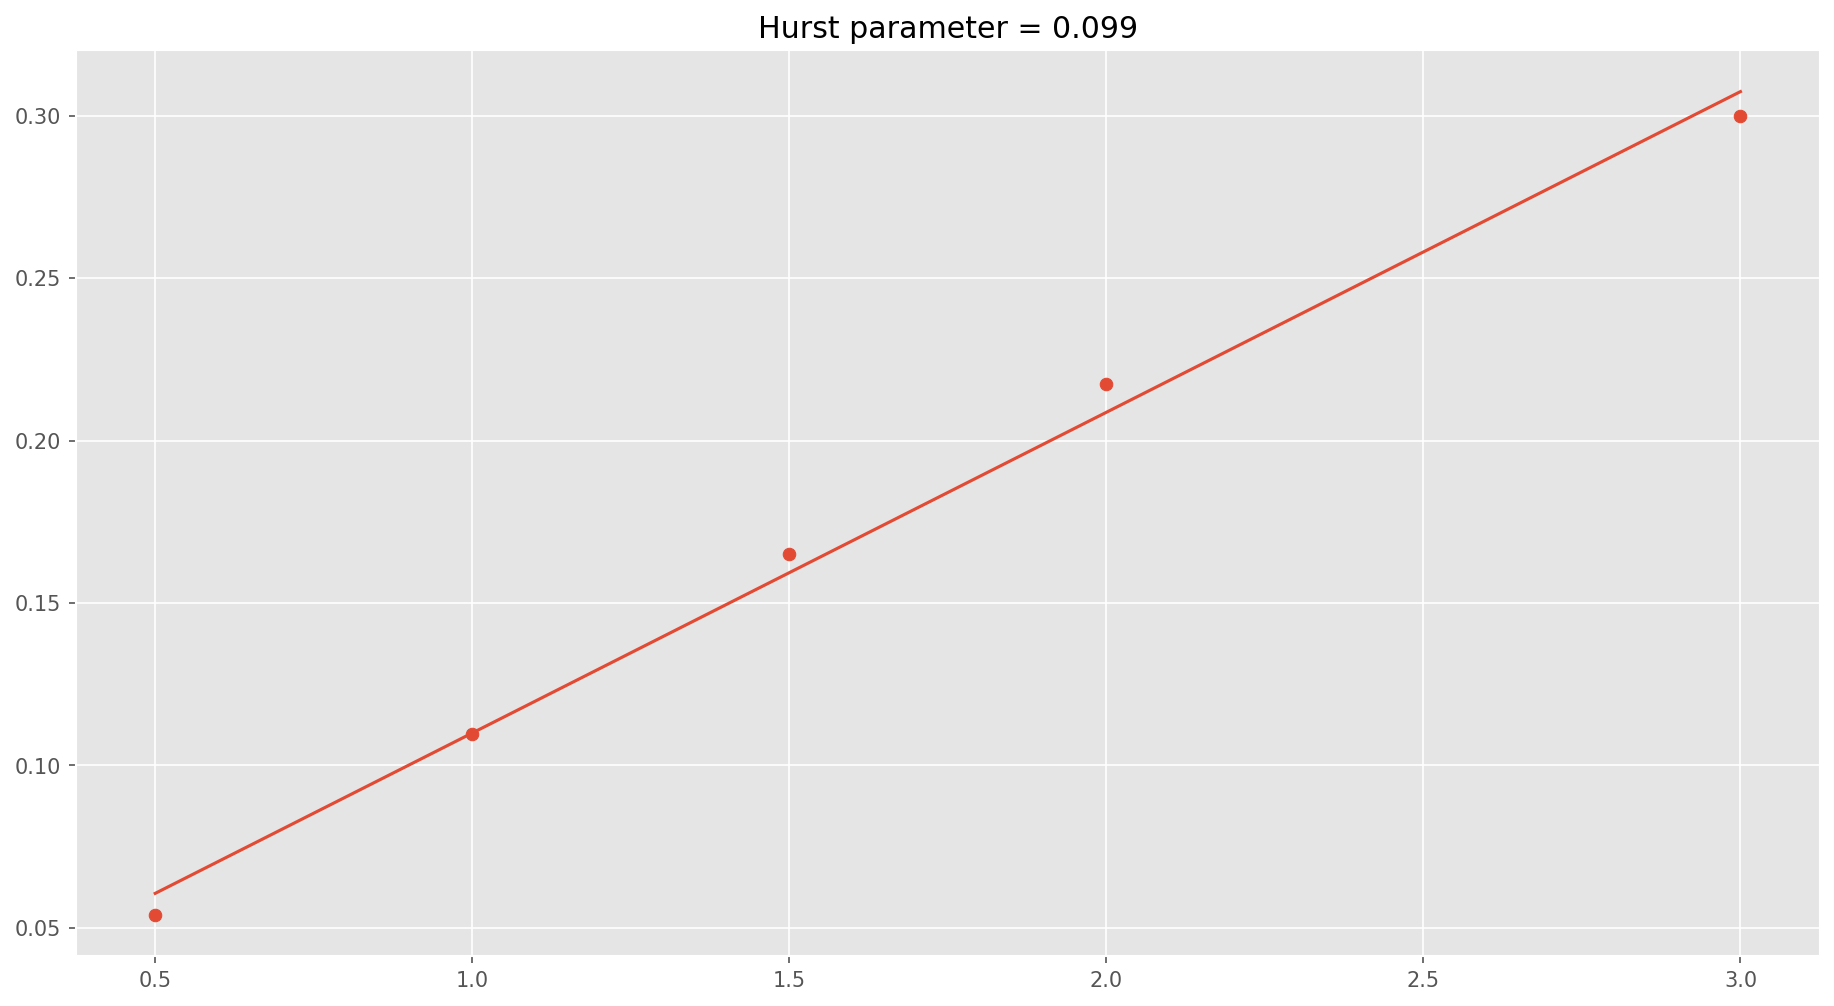

In [205]:
fig, ax = plt.subplots(1, 1, figsize = (15,8), dpi = 150)

b, a = np.polyfit(q, model.loc[0,:], 1)

plt.scatter(q, model)
plt.plot(q, b*np.array(q)+a)

plt.title('.OMXC25 Hurst parameter = {:.3f}'.format(b))

plt.show()

## Log diff distribution 

In [10]:
plot_df = df[df['Date'] <= pd.to_datetime('2014-03-31')] #Datoer fra Volatility is Rough
plot_df = plot_df[plot_df['rv5'] != 0] #Log(0) går ikke, har ikke undersøgt hvorfor vol estimeres til 0 på enkelte dage (21 ud af plot_df)

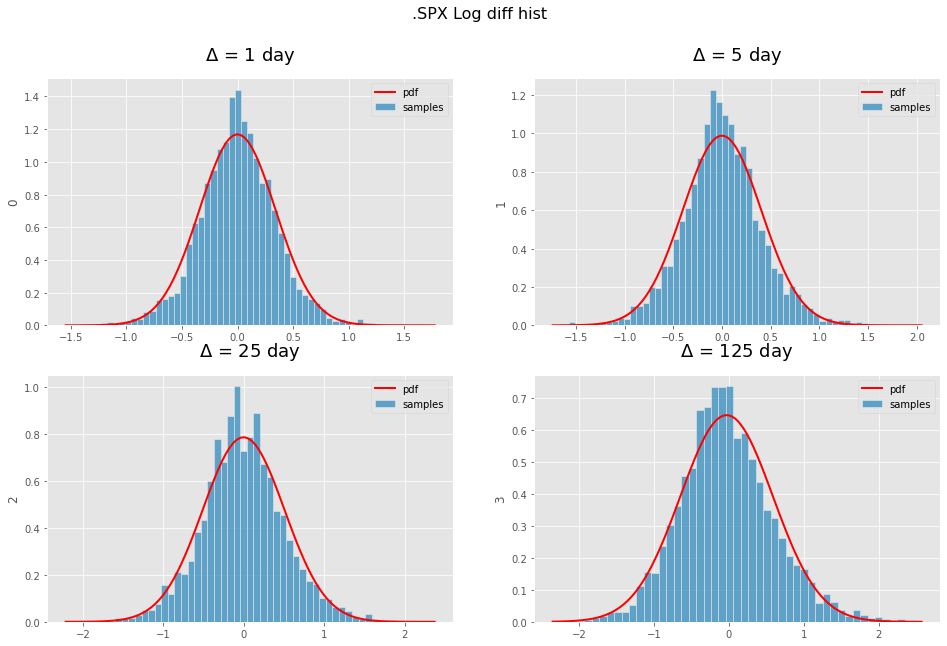

In [12]:
nrow = 2
ncol = 2
delta = [1, 5, 25, 125]

fig, axs = plt.subplots(nrow, ncol)

for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    sns.histplot(np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.SPX']['rv5'])).diff(delta[i]), kde=False, stat='density', label='samples', ax=ax)
    x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    mu, std = scipy.stats.norm.fit((np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.SPX']['rv5'])).diff(delta[i])).dropna())
    
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
    ax.legend()
    ax.set(xlabel=None)
    ax.set_title('$\Delta$ = %d day' % (delta[i]) , y=1.05, fontsize=18)

fig.suptitle('.SPX Log diff hist', fontsize=16)
plt.show()

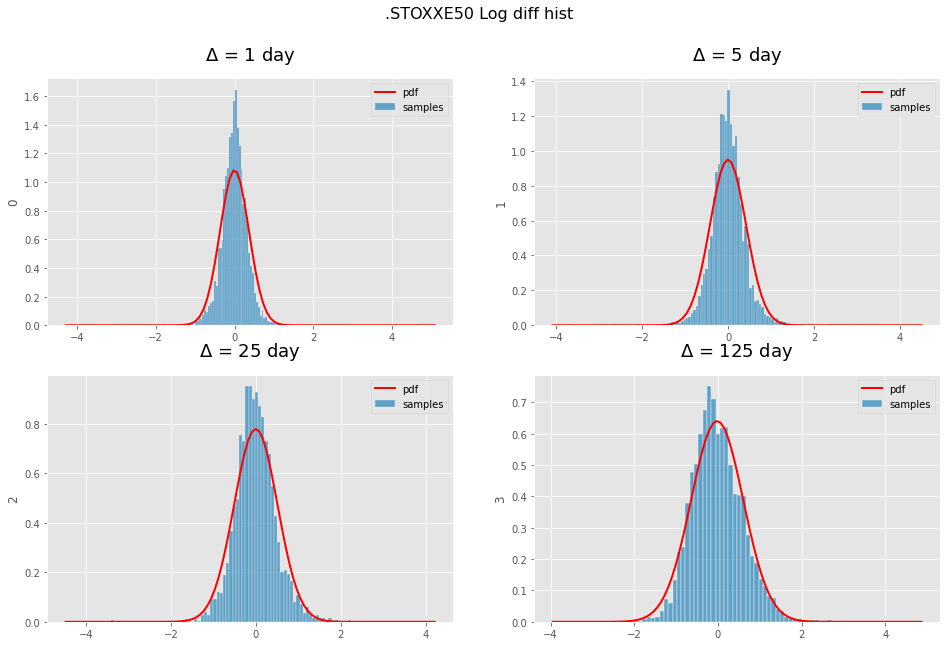

In [14]:
fig, axs = plt.subplots(nrow, ncol)

for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    sns.histplot(np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.STOXX50E']['rv5'])).diff(delta[i]), kde=False, stat='density', label='samples', ax=ax)
    x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    mu, std = scipy.stats.norm.fit((np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.STOXX50E']['rv5'])).diff(delta[i])).dropna())
    
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
    ax.legend()
    ax.set(xlabel=None)
    ax.set_title('$\Delta$ = %d day' % (delta[i]) , y=1.05, fontsize=18)

fig.suptitle('.STOXXE50 Log diff hist', fontsize=16)
plt.show()

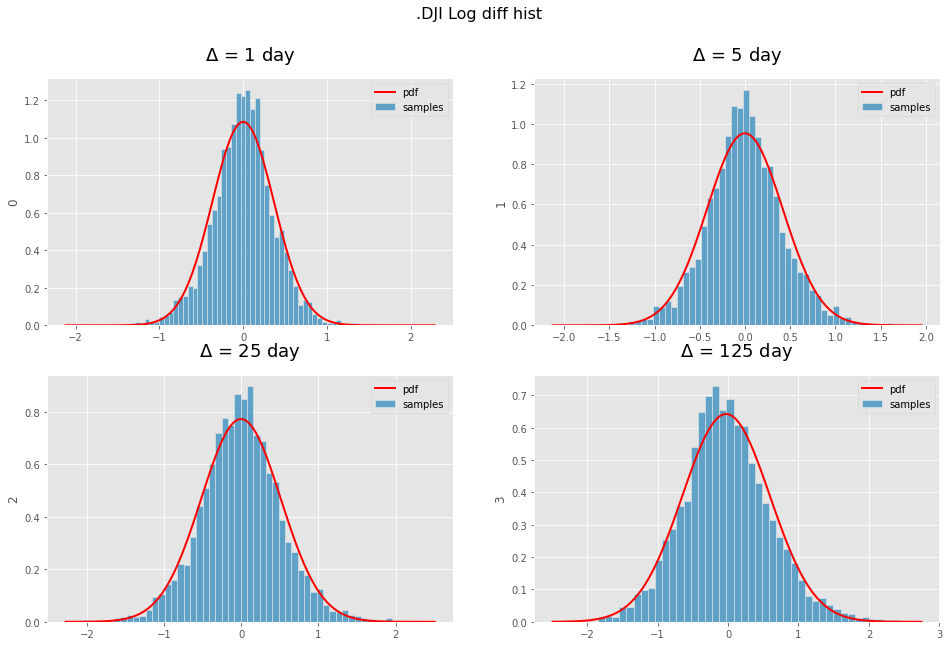

In [15]:
fig, axs = plt.subplots(nrow, ncol)

for i, ax in enumerate(fig.axes):
    ax.set_ylabel(str(i))
    sns.histplot(np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.DJI']['rv5'])).diff(delta[i]), kde=False, stat='density', label='samples', ax=ax)
    x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
    x_pdf = np.linspace(x0, x1, 100)
    mu, std = scipy.stats.norm.fit((np.log(np.sqrt(plot_df[plot_df['Symbol'] == '.DJI']['rv5'])).diff(delta[i])).dropna())
    
    y_pdf = scipy.stats.norm.pdf(x_pdf, mu, std)
    
    ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
    ax.legend()
    ax.set(xlabel=None)
    ax.set_title('$\Delta$ = %d day' % (delta[i]) , y=1.05, fontsize=18)

fig.suptitle('.DJI Log diff hist', fontsize=16)
plt.show()